In [1]:
# CÉLULA 1: Configuração e Importação

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhor visualização
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")

print("Bibliotecas importadas e configurações prontas.")

Bibliotecas importadas e configurações prontas.


In [3]:
# CÉLULA 2: Geração dos Dados Simulados

# 1. Definir o Período de Análise (Ex: 365 dias, a cada hora)
start_date = '2024-01-01'
end_date = '2025-01-01'

#Trocamos 'closed' por 'inclusive'
index = pd.date_range(start=start_date, end=end_date, freq='H', inclusive='left')
df = pd.DataFrame(index=index)

# 2. Definir Parâmetros Fixos
TARIFA = 0.80 # R$/kWh

# 3. Simulação de Ocupação
df['Dia_Semana'] = df.index.day_name()
df['Hora'] = df.index.hour

dias_uteis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
is_weekday = df['Dia_Semana'].isin(dias_uteis)
is_peak_hour = (df['Hora'] >= 8) & (df['Hora'] <= 18)

df['Ocupação (Simulada) (%)'] = np.where(
    is_weekday & is_peak_hour,
    np.random.randint(60, 100, size=len(df)),
    np.random.randint(0, 15, size=len(df)) # Baixa ocupação em folgas/noites
)

# 4. Simulação de Consumo por Categoria
base_consumo = np.random.uniform(0.1, 0.5, size=len(df))

iluminacao_fator = np.where(is_peak_hour, 1.5, 0.5)
df['Iluminação (kWh)'] = base_consumo * iluminacao_fator + np.random.uniform(0, 0.2)

df['Equipamentos (kWh)'] = (df['Ocupação (Simulada) (%)'] / 100) * 3.0 + 1.0 # Servidores + Uso

hvac_fator = np.where(is_peak_hour, 2.0, 0.5)
df['Climatização (HVAC) (kWh)'] = hvac_fator * (df['Ocupação (Simulada) (%)'] / 100) * 1.5

# 5. Cálculo do Consumo Total
df['Consumo Total (kWh)'] = df['Iluminação (kWh)'] + df['Equipamentos (kWh)'] + df['Climatização (HVAC) (kWh)']
df['Tarifa (R$/kWh)'] = TARIFA

# 6. Exibição dos dados
print(f"Dados gerados com sucesso para {len(df)} horas.")
print("\nPrimeiras 5 linhas do DataFrame:")
print(df[['Consumo Total (kWh)', 'Iluminação (kWh)', 'Climatização (HVAC) (kWh)', 'Ocupação (Simulada) (%)']].head())

Dados gerados com sucesso para 8784 horas.

Primeiras 5 linhas do DataFrame:
                     Consumo Total (kWh)  Iluminação (kWh)  \
2024-01-01 00:00:00                 1.84              0.39   
2024-01-01 01:00:00                 1.65              0.31   
2024-01-01 02:00:00                 1.53              0.23   
2024-01-01 03:00:00                 1.46              0.24   
2024-01-01 04:00:00                 1.57              0.35   

                     Climatização (HVAC) (kWh)  Ocupação (Simulada) (%)  
2024-01-01 00:00:00                       0.09                       12  
2024-01-01 01:00:00                       0.07                        9  
2024-01-01 02:00:00                       0.06                        8  
2024-01-01 03:00:00                       0.04                        6  
2024-01-01 04:00:00                       0.04                        6  


/tmp/ipython-input-1373531493.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index = pd.date_range(start=start_date, end=end_date, freq='H', inclusive='left')


In [4]:
# CÉLULA 3: Identificação e Quantificação do Desperdício

# 1. Definir o Limite de Ocupação para Considerar "Vazio"
# Usamos um limite de 15% de ocupação simulada como indicador de desperdício
LIMITE_DESPERDICIO = 15
df_desperdicio = df[df['Ocupação (Simulada) (%)'] < LIMITE_DESPERDICIO].copy()

# 2. Análise do Consumo Base (Consumo durante horas de desperdício)
# Consumo Total de Energia no período de "desperdício"
consumo_base_total_kwh = df_desperdicio['Consumo Total (kWh)'].sum()
custo_base_total_rs = consumo_base_total_kwh * df_desperdicio['Tarifa (R$/kWh)'].mean() # Usa a tarifa média

# 3. Cálculo de Métricas (Mensal e Diário)
num_dias = (df.index.max() - df.index.min()).days
num_meses = num_dias / 30.44

consumo_base_mensal_kwh = consumo_base_total_kwh / num_meses
custo_base_mensal_rs = custo_base_total_rs / num_meses

consumo_base_diario_kwh = consumo_base_total_kwh / num_dias
custo_base_diario_rs = custo_base_total_rs / num_dias

# 4. Exibir os Resultados
print(f"--- Análise de Consumo Base ({LIMITE_DESPERDICIO}% Ocupação) ---")
print(f"Período Total Analisado: {num_dias} dias ({num_meses:.1f} meses)")
print("===================================================")

print("\n💰 CUSTO BASE ESTIMADO:")
print(f"Total (1 ano): R$ {custo_base_total_rs:,.2f}")
print(f"Mensal (Médio): R$ **{custo_base_mensal_rs:,.2f}**")
print(f"Diário (Médio): R$ {custo_base_diario_rs:,.2f}")

print("\n⚡ CONSUMO BASE ESTIMADO:")
print(f"Total (1 ano): {consumo_base_total_kwh:,.2f} kWh")
print(f"Mensal (Médio): **{consumo_base_mensal_kwh:,.2f} kWh**")
print(f"Diário (Médio): {consumo_base_diario_kwh:,.2f} kWh")

print(f"\nDetalhes: O Consumo Base é a energia utilizada quando a ocupação simulada é inferior a {LIMITE_DESPERDICIO}%.")

--- Análise de Consumo Base (15% Ocupação) ---
Período Total Analisado: 365 dias (12.0 meses)

💰 CUSTO BASE ESTIMADO:
Total (1 ano): R$ 7,933.17
Mensal (Médio): R$ **661.60**
Diário (Médio): R$ 21.73

⚡ CONSUMO BASE ESTIMADO:
Total (1 ano): 9,916.46 kWh
Mensal (Médio): **827.01 kWh**
Diário (Médio): 27.17 kWh

Detalhes: O Consumo Base é a energia utilizada quando a ocupação simulada é inferior a 15%.


--- Visualização de Padrões de Consumo ---


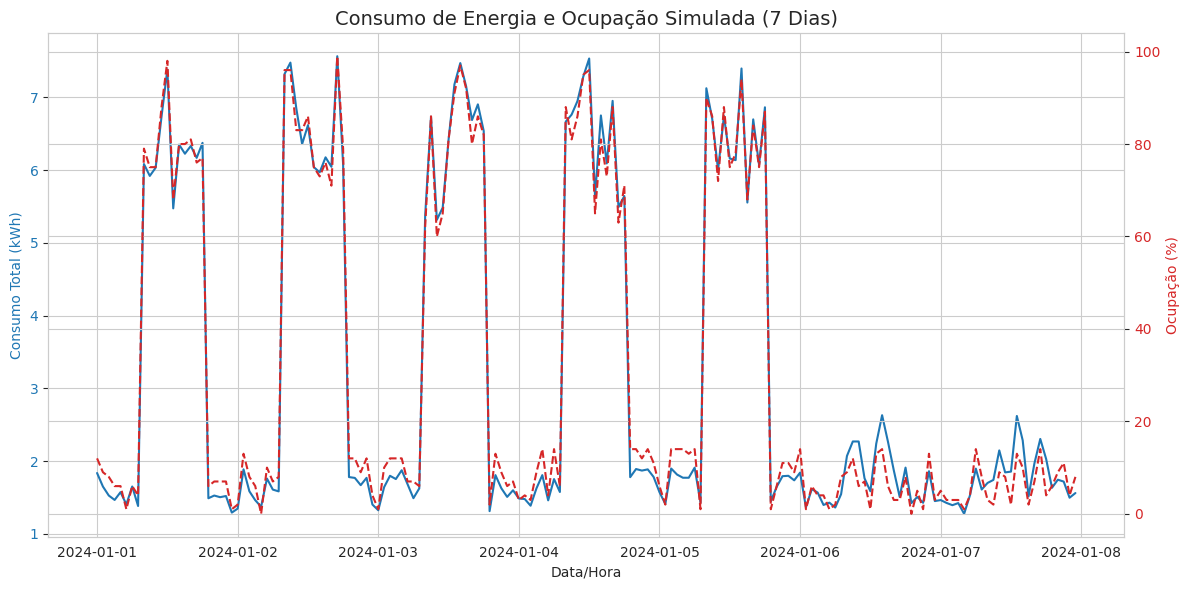


--- Consumo Médio por Hora do Dia (Identificação do Desperdício Noturno) ---


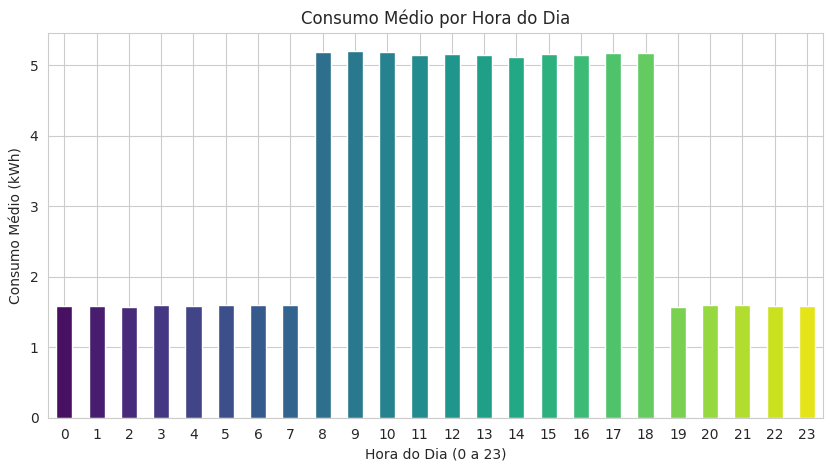

In [5]:
# CÉLULA 4: Visualização de Padrões e Desperdício

# 1. Gráfico de Série Temporal (Consumo Total e Ocupação) - Foco em 7 dias para clareza
print("--- Visualização de Padrões de Consumo ---")

# Filtrar para uma semana representativa (Exemplo: primeira semana de Janeiro)
df_semana = df.loc[df.index < df.index[0] + pd.Timedelta(days=7)]

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title('Consumo de Energia e Ocupação Simulada (7 Dias)', fontsize=14)

# Plotar Consumo Total (Eixo Esquerdo)
color = 'tab:blue'
ax1.set_xlabel('Data/Hora')
ax1.set_ylabel('Consumo Total (kWh)', color=color)
ax1.plot(df_semana.index, df_semana['Consumo Total (kWh)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plotar Ocupação (Eixo Direito)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Ocupação (%)', color=color)
ax2.plot(df_semana.index, df_semana['Ocupação (Simulada) (%)'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# A análise visual aqui confirma que o consumo alto acompanha a ocupação, mas persiste um consumo base significativo (desperdício) quando a ocupação cai.

print("\n--- Consumo Médio por Hora do Dia (Identificação do Desperdício Noturno) ---")

# 2. Gráfico de Barras: Consumo Médio por Hora do Dia
df_hora = df.groupby(df.index.hour)['Consumo Total (kWh)'].mean()

plt.figure(figsize=(10, 5))
df_hora.plot(kind='bar', color=sns.color_palette("viridis", len(df_hora)))
plt.title('Consumo Médio por Hora do Dia')
plt.xlabel('Hora do Dia (0 a 23)')
plt.ylabel('Consumo Médio (kWh)')
plt.xticks(rotation=0)
plt.show()

# A análise visual aqui destaca o consumo residual significativo entre 18h e 8h, reforçando o potencial de economia do Ajuste 1 (Automação).

In [7]:
# CÉLULA 5: Cálculo e Consolidação de Ganhos

print("--- 1. Recálculo das Variáveis de Desperdício (Ajuste 1) ---")

# Reutilizar variáveis da Célula 3 para garantir consistência
dias_uteis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
horas_desperdicio = (df['Hora'] >= 18) | (df['Hora'] < 8)
fim_de_semana = ~df['Dia_Semana'].isin(dias_uteis)
consumo_base = df[horas_desperdicio | fim_de_semana].copy()


# AJUSTE 1: Automação Noturna (Iluminação e Equipamentos)
# Proposta: Redução de 40% na Iluminação e 20% em Equipamentos no período de desperdício.
reducao_iluminacao = consumo_base['Iluminação (kWh)'].sum() * 0.40
reducao_equipamentos = consumo_base['Equipamentos (kWh)'].sum() * 0.20
ganho_ajuste_1_kWh = reducao_iluminacao + reducao_equipamentos

print(f"Ganho Estimado (Ajuste 1 - Automação): {ganho_ajuste_1_kWh:,.2f} kWh/ano")
print("-----------------------------------------------------------------")


# AJUSTE 2: Otimização da Climatização (HVAC Adaptativo)
# Filtrar apenas o consumo em horário comercial com Baixa Ocupação (< 50%)
df_prod = df[is_weekday & is_peak_hour].copy()
baixa_ocupacao = df_prod['Ocupação (Simulada) (%)'] < 50
consumo_hvac_baixa_ocup = df_prod[baixa_ocupacao]['Climatização (HVAC) (kWh)'].sum()

# Proposta: Redução de 15% do consumo de HVAC nos períodos de Baixa Ocupação.
ganho_ajuste_2_kWh = consumo_hvac_baixa_ocup * 0.15

print(f"Ganho Estimado (Ajuste 2 - HVAC Adaptativo): {ganho_ajuste_2_kWh:,.2f} kWh/ano")
print("=================================================================")


# 2. Consolidação dos Ganhos

# Dados de entrada (tarifa média e fator CO2)
tarifa_media = df['Tarifa (R$/kWh)'].mean()
FATOR_EMISSAO_CO2 = 0.06 # kg CO2e/kWh (Referência média Brasil)

# Ganho total de energia
ganho_total_kWh_anual = ganho_ajuste_1_kWh + ganho_ajuste_2_kWh
consumo_total_geral_kWh = df['Consumo Total (kWh)'].sum()
percentual_reducao = (ganho_total_kWh_anual / consumo_total_geral_kWh) * 100

# Ganhos Financeiros
ganho_financeiro_R_anual = ganho_total_kWh_anual * tarifa_media
ganho_financeiro_R_mensal = ganho_financeiro_R_anual / 12

# Ganhos Ambientais
ganho_ambiental_kg_co2 = ganho_total_kWh_anual * FATOR_EMISSAO_CO2

print("\n📈 RESULTADOS FINAIS E IMPACTO DA SOLUÇÃO")
print(f"1. Redução Anual Total de Consumo: **{ganho_total_kWh_anual:,.2f} kWh**")
print(f"   (Representa {percentual_reducao:.2f}% do consumo total)")
print("---------------------------------------------------------------")
print(f"2. Economia Financeira Anual Estimada: **R$ {ganho_financeiro_R_anual:,.2f}**")
print(f"   (Economia Mensal Média: R$ {ganho_financeiro_R_mensal:,.2f})")
print("---------------------------------------------------------------")
print(f"3. Redução de Emissão de CO2 Anual: **{ganho_ambiental_kg_co2:,.2f} kg CO2e**")
print("===============================================================")
print("A análise de dados está completa, e os resultados atendem aos requisitos da Opção A.")

--- 1. Recálculo das Variáveis de Desperdício (Ajuste 1) ---
Ganho Estimado (Ajuste 1 - Automação): 2,581.29 kWh/ano
-----------------------------------------------------------------
Ganho Estimado (Ajuste 2 - HVAC Adaptativo): 0.00 kWh/ano

📈 RESULTADOS FINAIS E IMPACTO DA SOLUÇÃO
1. Redução Anual Total de Consumo: **2,581.29 kWh**
   (Representa 9.10% do consumo total)
---------------------------------------------------------------
2. Economia Financeira Anual Estimada: **R$ 2,065.03**
   (Economia Mensal Média: R$ 172.09)
---------------------------------------------------------------
3. Redução de Emissão de CO2 Anual: **154.88 kg CO2e**
A análise de dados está completa, e os resultados atendem aos requisitos da Opção A.


In [8]:
# CÉLULA EXTRA: Gerar e Salvar o CSV para o GitHub

# Certifique-se de que a Célula 2 (geração de df) foi executada.
df_final_csv = df.copy()

# Remover colunas auxiliares
df_final_csv = df_final_csv.drop(columns=['Dia_Semana', 'Hora'])

# Salvar o arquivo CSV no Colab
nome_arquivo = 'consumo_simulado.csv'
df_final_csv.to_csv(nome_arquivo, index_label='Data/Hora')

print(f"O arquivo '{nome_arquivo}' foi salvo. Baixe-o clicando no ícone de pasta à esquerda no Colab e depois no ícone de download ao lado do arquivo.")

O arquivo 'consumo_simulado.csv' foi salvo. Baixe-o clicando no ícone de pasta à esquerda no Colab e depois no ícone de download ao lado do arquivo.
